# 題目 - Find the constructions !
data：2022年PTT美食版共四個月的資料


> 請在資料中找出下列5個two-slot-construction（2個變項)：

1.   X + 的 + Y + 的
2.   不 + X1 + 不 + X2
3.   X + 了 + Y + 了
4.   一 + q1 + 一 + q2
5.   好 + v1 + 好 + v2

需要特別留意的是，我們並非在尋找四字格，X, Y等這些變項都是word (not character)！



---





資料來源參考晴方學姊:
[北大構式語料庫](http://ccl.pku.edu.cn/ccgd/)共收錄了1113個簡體中文構式。
晴方學姊以PTT 2020年整年的15個版去篩選（台灣繁體語用），其中共有25個構式有超過100筆，最後選出12個有多義的構式進行研究。
[Demo App ](https://andreashih.shinyapps.io/cca-python1/?fbclid=IwAR1Ii3jl4rmfd4bEQNE3TqmIUw55ctqiO1mRdYLht-54MKgeVgHdgUvJhzo)









##（1) 前處理（10%)

資料格式為json檔，每一篇PTT貼文會有title跟content，其中content包含po文內容跟留言，都已經用換行符號斷句。

請用上週的方式清理資料，並用ckip進行斷詞。

In [ ]:
data[0]

{'title': '[食記] 台南.柳營-露水雞。鄉野小路間的美食',
 'content': ['餐廳名稱：台南。柳營》露水雞',
  '   消費時間：2022年/01月',
  '   地址：台南市柳營區旭山里山子腳10鄰21之25號(縣道165號23K處)',
  '   電話：(06)623-1799',
  '   營業時間：10:30-14:00/17:00-19:30(週一公休)',
  '   每人平均價位：350元左右',
  '   可否刷卡：否',
  '   有無包廂：無',
  '   推薦菜色：枸杞雞.茄餅',
  '   圖文網誌版：https://bo2popo.com/202201-ta04/',
  '話說這家露水雞可是誤打誤撞發現的在地名店。',
  '讓我老公讚不絕口，直誇有機會下次還要再來。',
  '元旦連假，不想出遠門人擠人，想說帶小孩鄰近的區域走走，',
  '往仙湖農場的途中發現這間很多人排隊的店。',
  '看似簡陋的鐵皮屋，加上偌大的招牌只寫了大大的「露水雞」三字，',
  '讓人燃起無限的好奇心。google了一下才發現還蠻多人推薦的，',
  '就決定回程時再來用餐。後來發現，',
  '輸入地址會找不到地方，直接設「柳營露水雞」就可以了。',
  '店外只有畫幾格停車格，很快就滿格，基本上道路兩旁也都可以停車。',
  '晚餐時間5點開始營業，我們約莫5點半左右到達，竟然已經客滿。',
  '生意真的是出乎意料外的好，',
  '基本上到了就先拿點餐單，劃記完後拿給門口小哥後就等著安排座位入座。',
  '用餐規則不少：',
  '1.假日需現場候位，不接受訂位。',
  '2.現場請等候安排座位，勿直接入內佔位。(人要全到才能入座)',
  '3.店內無販售酒精性飲料。',
  '4.寵物請勿進入餐廳。',
  '5.餐廳內全面禁菸。',
  '基本上這些規定都還算蠻可以，',
  '尤其是第二點，我覺得非常好，反正就是按順序等座位也比較公平。',
  '服務態度算可以，基本上臉酷酷的櫃台小哥已經算是裡面最親切的，',
  '我家以前也開過餐廳，倒是能理解忙起來的時候總是會忘記笑容。',
  '店內用餐空間不算大，約莫8~9張圓桌，',
  '有些桌距很近，相鄰的椅子會撞椅子，坐起來是蠻擁擠的。',


In [ ]:
# 要清理掉的regex
trash_regex = "@\S+|https?:\S+|http?:\S|[^\u4E00-\u9FD5]"

In [ ]:
txt[:10]

['食記台南柳營露水雞鄉野小路間的美食',
 '餐廳名稱台南柳營露水雞',
 '消費時間年月',
 '地址台南市柳營區旭山里山子腳鄰之號縣道號處',
 '電話',
 '營業時間週一公休',
 '每人平均價位元左右',
 '可否刷卡否',
 '有無包廂無',
 '推薦菜色枸杞雞茄餅']

In [ ]:
! pip3 install -U ckip-transformers
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger

# tokenize function
## ws: [['A','B'],['a','b','c']]  
## output:['A B', 'a b c']

def tokenize(texts, ws_driver, batch_size=512, max_length=256):
    output=[]
    ws  = ws_driver(texts, use_delim=False, 
                batch_size = batch_size,
                 max_length = max_length
                )
    output = [" ".join(ls) for ls in ws]
    return ws, output

In [ ]:
'''執行階段記得選GPU 不然會很久很久很久'''
ws_driver = CkipWordSegmenter(device=0)
ws, output = tokenize(txt, ws_driver)
output[:10]

Inference: 100%|██████████| 190/190 [14:57<00:00,  4.72s/it]


['食記 台南 柳營 露水雞 鄉野 小路 間 的 美食',
 '餐廳 名稱 台南 柳營 露水雞',
 '消費 時間 年 月',
 '地址 台南市 柳營區 旭山里 山子腳鄰 之號 縣道號 處',
 '電話',
 '營業 時間 週一 公休',
 '每 人 平均 價位 元 左右',
 '可否 刷卡 否',
 '有無 包廂 無',
 '推薦 菜色 枸杞 雞 茄餅']

## (2) 找出構式！(40%)


整理出一個構式DataFrame，包含7個欄位：

*   form: construction pattern
*   cnstr: 資料中match到的構式（10%)
*   cntxt: context，出現構式的那整個句子 (10%)
*   var_1: 第一個變項 (5%)
*   var_2: 第二個變項 (5%)
*   var1_pos: 第一個變項的詞性 (5%)
*   var2_pos: 第二個變項的詞性 (5%)

請注意！
詞性的篩選請至少以「資料中match到的構式」為單位，例如「吃 的 喝 的」要整組進行pos-tagging，再取出變項「吃」跟「喝」的詞性，不可以只有單獨tag「吃」跟「喝」。

> ⚠️⚠️⚠️``print df[300:310]``⚠️⚠️⚠️

In [ ]:
cnstrs = [
    ["X", "+", "的", "+", "Y", "+", "的"],
    ["不", "+", "X1", "+", "不", "+", "X2"],
    ["X", "+", "了", "+", "Y", "+", "了"],
    ["好", "+", "v1", "+", "好", "+", "v2"],
    ["一", "+", "q1", "+", "一", "+", "q2"]
]

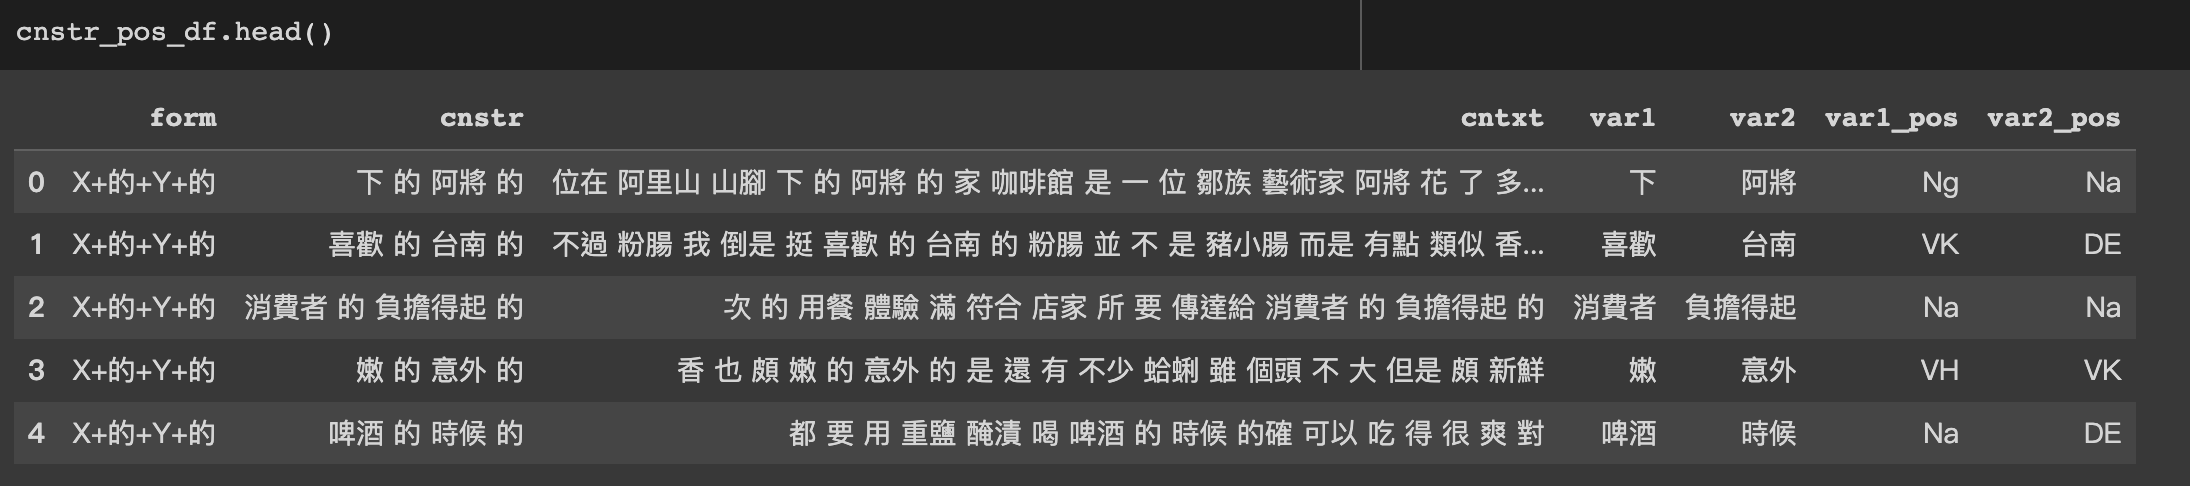

## (3) 篩選詞性，計算frequency（20%)

> 詞性的篩選要根據代號：
1.   cnstr_1 = X + 的 + Y + 的
2.   cnstr_2 = 不 + X1 + 不 + X2
3.   cnstr_3 = X + 了 + Y + 了
4.   cnstr_4 = 一 + q1 + 一 + q2
5.   cnstr_5 = 好 + v1 + 好 + v2



*    X, Y: 不限詞性且兩個常項可以是不同詞性
*    X1, X2: 不限詞性但兩個常項必須為同一詞性
*    v1, v2: 兩個常項都必須為動詞（V[A-Z]）
*    q1, q2: 兩個常項都必須為量詞（Nf)

透過詞性將不符合的row排除後，計算出 **每個構式總計出現的次數 (10%)** 以及 **出現次數最多的前10名 (10%)** 。

In [ ]:
'''這裡的「g1+了+g2+了」已簡化成「X+了+Y+了」即可'''

form_k = list(set(cnstr_pos_df.form.to_list()))

stats = cnstr_pos_df.groupby('form')['cnstr'].value_counts()
for k in form_k:
  print(f'{k}: {stats[k].sum()}')

g1+了+g2+了: 18
好+v1+好+v2: 17
X+的+Y+的: 292
一+q1+一+q2: 27
不+X1+不+X2: 24


In [ ]:
stats['好+v1+好+v2']

cnstr
好 久 好 久       1
好 乖 好 慵懶      1
好 可惜 好 想      1
好 好吃 好 香      1
好 嫩 好 新鮮      1
好 彈 好 甜       1
好 想 好 想       1
好 滑 好 順口      1
好 滿足 好 飽      1
好 軟 好 嫩       1
好 軟嫩 好 好吃     1
好 逛 好 買       1
好 酥 好 脆       1
好 酥 好 酥       1
好 長 好 長       1
好 飽 好 飽       1
好 香 好 鮮美      1
Name: cnstr, dtype: int64

## (4) 分析構式及語境（30%)
> 挑選3個構式，對其進行分析（可以是質性或量化分析）。(各10%)

例如：
分析 A 構式
- A 構式常出現在什麼discourse context （提醒、建議、論述、警告、批判等等），可能是什麼原因？
- 在一個句子中，常跟A構式共同出現的字詞、詞性、人稱、動詞類型、其他構式等等，可能是什麼原因？
- 用CwnGraph或dependency parser，分析 A 構式內部（那4個token）的構詞關係、語意關係、句法結構... 

`不一定要針對上述項目做分析，請多觀察你整理的資料，並且佐以查到的語言學、構式相關資料，發揮想像力＆平時做研究的分析能力！`
